## PandaSDMX package - very helpful in our case

In [1]:
import pandasdmx as sdmx

unsd = sdmx.Request('UNSD') #Get the UNSD Dataset client

In [2]:
flow_msg = unsd.dataflow() #Get the dataflow (I found later that we can only work with datastructures)
str_msg = unsd.datastructure() #Get the datastructure

In [49]:
flow_msg.response.url, flow_msg.response.headers, str_msg.response.url, str_msg.response.headers

('https://data.un.org/WS/rest/dataflow/UNSD/latest',
 {'Content-Type': 'application/vnd.sdmx.structure+xml; version=2.1; charset=utf-8', 'Server': 'Microsoft-IIS/8.5', 'X-Powered-By': 'ASP.NET', 'X-Xss-Protection': '1; mode=block', 'Referrer-Policy': 'no-referrer-when-downgrade', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'SAMEORIGIN', 'Feature-Policy': "vibrate 'none'; geolocation 'none'; midi 'none'; notifications 'none'; push 'none'; sync-xhr 'none'; microphone 'none'; camera 'none'; magnetometer 'none'; gyroscope 'none'; speaker 'none'; vibrate 'none'; fullscreen 'none'; payment 'none'", 'Access-Control-Allow-Origin': '*', 'Date': 'Sun, 22 Nov 2020 03:04:48 GMT', 'Content-Length': '3015'},
 'https://data.un.org/WS/rest/datastructure/UNSD/latest',
 {'Transfer-Encoding': 'chunked', 'Content-Type': 'application/vnd.sdmx.structure+xml; version=2.1; charset=utf-8', 'Server': 'Microsoft-IIS/8.5', 'X-Powered-By': 'ASP.NET', 'X-Xss-Protection': '1; mode=block', 'Referrer-Polic

In [5]:
flow_msg, str_msg # This shows the names of the dataflows and datastructures, also constraints

(<pandasdmx.StructureMessage>
   <Header>
     id: 'IDREF129'
     prepared: '2020-11-22T04:04:49.143327+01:00'
     receiver: <Agency Unknown>
     sender: <Agency Unknown>
     source: 
     test: False
   response: <Response [200]>
   DataflowDefinition (5): DF_UNDATA_COUNTRYDATA DF_UNDATA_SEEA_SUPPLY D...
   DataStructureDefinition (4): CountryData SEEANRG DSD_ENERGY_BALANCE_U...,
 <pandasdmx.StructureMessage>
   <Header>
     id: 'IDREF130'
     prepared: '2020-11-22T04:04:50.792861+01:00'
     receiver: <Agency Unknown>
     sender: <Agency Unknown>
     source: 
     test: False
   response: <Response [200]>
   Codelist (27): CL_FREQ_MDG CL_SERIES_COUNTRY_DATA CL_UNIT_COUNTRY_DAT...
   ConceptScheme (4): MDG_DATA_CONCEPTS CS_ENERGY_BALANCE_UNDATA CS_UNDA...
   DataStructureDefinition (4): CountryData DSD_ENERGY_BALANCE_UNDATA DS...)

## Working with dataflows

In [6]:
dataflows = sdmx.to_pandas(flow_msg.dataflow) #All dataflows
dataflows

DF_UNDATA_COUNTRYDATA             SDMX-CountryData
DF_UNDATA_SEEA_SUPPLY             SEEA SUPPLY DATA
DF_UNDATA_SEEA_USE                   SEEA USE DATA
DF_UNData_EnergyBalance    Energy Balance DataFlow
DF_UNData_UNFCC                    SDMX_GHG_UNDATA
dtype: object

In [7]:
dataflows[dataflows.str.contains('Energy', case=False)] #Seacrch similar dataflows

DF_UNData_EnergyBalance    Energy Balance DataFlow
dtype: object

In [8]:
unfcc_msg = unsd.dataflow('DF_UNData_UNFCC') #Select one dataflow, we chose the Greenhouse gas one
unfcc_msg

<pandasdmx.StructureMessage>
  <Header>
    id: 'IDREF131'
    prepared: '2020-11-22T04:07:14.497460+01:00'
    receiver: <Agency Unknown>
    sender: <Agency Unknown>
    source: 
    test: False
  response: <Response [200]>
  Categorisation (1): DF_UNData_UNFCC@ESTAT@10@UNdata_Categories@10@ENVI
  CategoryScheme (1): UNdata_Categories
  Codelist (4): CL_FREQ CL_INDICATOR CL_REF_AREA CL_UNIT
  ConceptScheme (1): CS_UNDATA
  DataflowDefinition (1): DF_UNData_UNFCC
  DataStructureDefinition (1): DSD_GHG_UNDATA

In [9]:
unfcc_flow = unfcc_msg.dataflow.DF_UNData_UNFCC #Get the dataflow

In [10]:
dsd = unfcc_flow.structure # We can reach the structure through dataflowflow
dsd

<DataStructureDefinition UNSD:DSD_GHG_UNDATA(1.0): Green House Gas DSD>

In [11]:
dsd is unfcc_msg.structure.DSD_GHG_UNDATA #Another way to access the structure

True

In [12]:
dsd.dimensions.components

[<Dimension FREQ>,
 <Dimension INDICATOR>,
 <Dimension REF_AREA>,
 <Dimension UNIT>,
 <TimeDimension TIME_PERIOD>]

## Working with datastructures

In [52]:
datastructure = sdmx.to_pandas(str_msg.structure)
datastructure

CountryData                                          SDMX-CountryData
DSD_ENERGY_BALANCE_UNDATA    Energy Balance Data Structure Definition
DSD_GHG_UNDATA                                    Green House Gas DSD
DSD_WPP_UNDATA                         World Population Prospects DSD
dtype: object

In [53]:
ghg_msg = unsd.datastructure('DSD_GHG_UNDATA')
ghg_msg

<pandasdmx.StructureMessage>
  <Header>
    id: 'IDREF145'
    prepared: '2020-11-22T04:42:00.351782+01:00'
    receiver: <Agency Unknown>
    sender: <Agency Unknown>
    source: 
    test: False
  response: <Response [200]>
  Codelist (4): CL_FREQ CL_INDICATOR CL_REF_AREA CL_UNIT
  ConceptScheme (1): CS_UNDATA
  DataflowDefinition (1): DF_UNData_UNFCC
  DataStructureDefinition (1): DSD_GHG_UNDATA

In [55]:
for cl in 'CL_FREQ','CL_INDICATOR','CL_REF_AREA','CL_UNIT':
    print(sdmx.to_pandas(ghg_msg.codelist[cl])) # COde list is basically all the elements the data is grouped by

CL_FREQ
A                   Annual
S    Half-yearly, semester
Q                Quarterly
M                  Monthly
W                   Weekly
D                    Daily
B    Daily - business week
N                 Minutely
Name: Frequency Cross-Domain Codelist, dtype: object
CL_INDICATOR
EN_ATM_METH_XLULUCF    Methane (CH4) Emissions without Land Use, Land...
EN_ATM_CO2E_XLULUCF    Carbon dioxide (CO2) Emissions without Land Us...
EN_CLC_GHGE_XLULUCF    Greenhouse Gas (GHGs) Emissions without Land U...
EN_ATM_HFCE                          Hydrofluorocarbons (HFCs) Emissions
EN_ATM_NO2E_XLULUCF    Nitrous oxide (N2O) Emissions without Land Use...
EN_ATM_PFCE                            Perfluorocarbons (PFCs) Emissions
EN_ATM_SF6E                         Sulphur hexafluoride (SF6) Emissions
Name: Indicator GHG CodeList, dtype: object
CL_REF_AREA
AUS                                            Australia
AUT                                              Austria
BLR                          

In [46]:
resp = unsd.data('DF_UNData_UNFCC')

In [57]:
data = resp.to_pandas()
data.head()

FREQ  INDICATOR            REF_AREA  UNIT    TIME_PERIOD
A     EN_ATM_CO2E_XLULUCF  AUS       Gg_CO2  1990           278424.375726
                                             1991           279872.363891
                                             1992           284912.124330
                                             1993           289234.856483
                                             1994           294014.610394
Name: value, dtype: float64

In [78]:
b = data['A']['EN_ATM_CO2E_XLULUCF']['USA']['Gg_CO2']

In [85]:
b.values

array([5121179.43963622, 5071563.91412935, 5174670.60072745,
       5281386.60838635, 5375033.8031307 , 5436697.98564571,
       5625041.88495804, 5701920.91944147, 5749893.05632887,
       5829519.95115461, 5997298.91224708, 5899855.4845548 ,
       5942421.40960999, 5991190.93456165, 6105444.10977108,
       6130552.41652904, 6050384.60371289, 6127888.22111662,
       5928256.32899496, 5493547.90815184, 5700108.33654193,
       5572584.77548628, 5371777.17015237, 5522908.36543317,
       5572106.31215707, 5422965.67734736, 5306662.45700516,
       5270748.52543583])

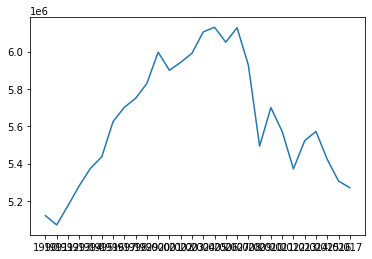

In [86]:
import matplotlib.pyplot as plt

plt.plot(b.index.values,b.values)

## Check Codelists

In [24]:
cl = dsd.dimensions.get('FREQ').local_representation.enumerated #We work with the FREQ dimension

In [25]:
cl

<Codelist UNSD:CL_FREQ(1.0) (8 items): Frequency Cross-Domain Codelist>

In [26]:
cl is unfcc_msg.codelist.CL_FREQ #Another Way to obtain Codelist for a dimension

True

In [27]:
sdmx.to_pandas(cl)

CL_FREQ
A                   Annual
S    Half-yearly, semester
Q                Quarterly
M                  Monthly
W                   Weekly
D                    Daily
B    Daily - business week
N                 Minutely
Name: Frequency Cross-Domain Codelist, dtype: object

In [30]:
for cl in 'A', 'B':
    print(sdmx.to_pandas(str_msg.codelist[cl]))

KeyError: 'A'

In [ ]:
cl.parse_raw()

In [ ]:
sdmx.to_pandas(cl.)